# **Group Work Project 3 of Deep Learning**

| Student Group | 6888 |
|:||
|Team member A |Ebenezer Yeboah|
|Team member B |Jatin Rai|


In [1]:
#loading necessary libraries
import math
from scipy.optimize import brute, fmin
from scipy.integrate import quad
import yfinance as yf
import pandas_datareader as pdr  # Access FRED
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from pyts.image import GramianAngularField
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.callbacks import EarlyStopping
# import warnings
# warnings.filterwarnings('ignore')



early_stopping = EarlyStopping(monitor='val_loss', patience=2)

## **Step 1a**

In [2]:
ticker = 'BTC-USD'
data = yf.download(ticker, start='2019-01-01', end='2024-06-01')

data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
2019-01-05,3851.973877,3904.903076,3836.900146,3845.194580,3845.194580,5137609824


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1978.000000,1978.000000,1978.000000,1978.000000,1978.000000,1.978000e+03
mean,27160.691103,27775.540694,26509.066294,27190.904565,27190.904565,2.933005e+10
std,18098.182178,18541.531507,17598.985421,18110.150422,18110.150422,1.799037e+10
min,3401.376465,3427.945557,3391.023682,3399.471680,3399.471680,4.324201e+09
25%,10128.262695,10280.992676,9836.195312,10133.149902,10133.149902,1.737584e+10
50%,24196.242188,24810.732422,23675.592773,24252.687500,24252.687500,2.600370e+10
75%,40657.702148,41872.262695,39618.038086,40760.472656,40760.472656,3.663062e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


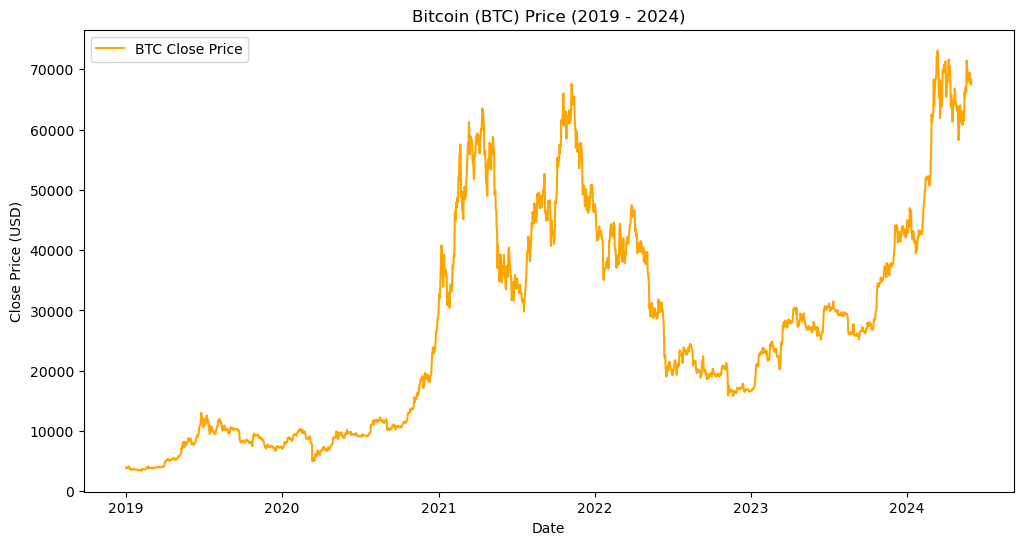

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='BTC Close Price', color='orange')
plt.title('Bitcoin (BTC) Price (2019 - 2024)')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

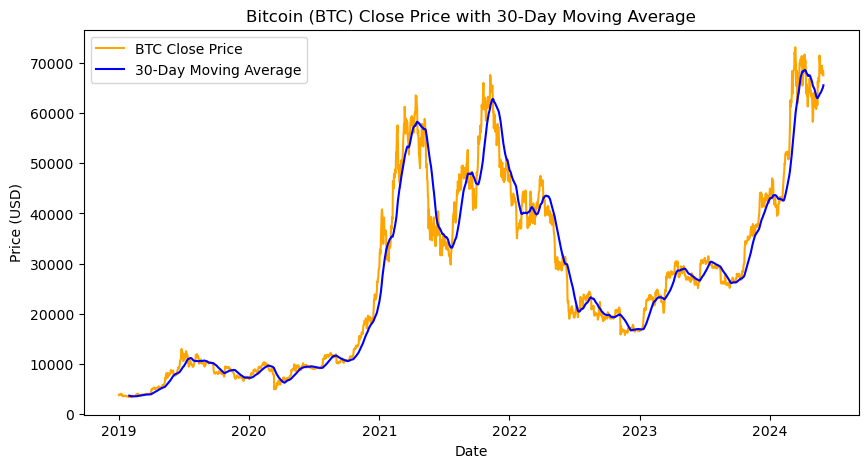

In [5]:
#30-day moving average
data['30_MA'] = data['Close'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Close'], label='BTC Close Price', color='orange')
plt.plot(data.index, data['30_MA'], label='30-Day Moving Average', color='blue')
plt.title('Bitcoin (BTC) Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

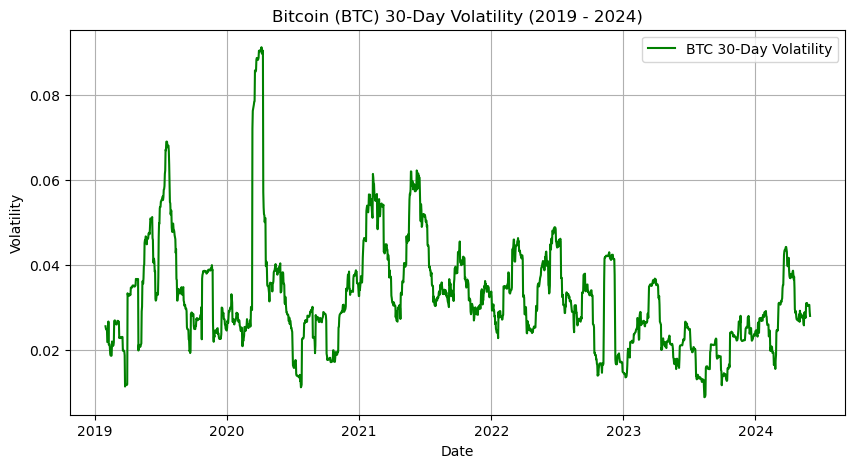

In [6]:
data['Returns'] = data['Close'].pct_change()
data['Volatility'] = data['Returns'].rolling(window=30).std()

plt.figure(figsize=(10,5))
plt.plot(data.index, data['Volatility'], label='BTC 30-Day Volatility', color='green')
plt.title('Bitcoin (BTC) 30-Day Volatility (2019 - 2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()


### Step 1b
### Predictive Model

In [7]:
data['Returns'] = data['Close'].pct_change().dropna()
# data['Lagged_Return'] = data['Returns'].shift(1)
data = data.dropna()


In [8]:
data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

X = data_shuffled[['Open', 'High', 'Low', 'Close', 'Volume']]  # Features
y = data_shuffled['Returns']  # Target (Returns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [10]:
#Evaluation using mse and r squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.0003522803128110677
R-squared (R2): 0.6636532030066886


In [11]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

X_train_no_leak = train_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_train_no_leak = train_data['Returns']
X_test_no_leak = test_data[['Open', 'High', 'Low', 'Close', 'Volume']]
y_test_no_leak = test_data['Returns']

In [12]:
model.fit(X_train_no_leak, y_train_no_leak)
y_pred_no_leak = model.predict(X_test_no_leak)

mse_no_leak = mean_squared_error(y_test_no_leak, y_pred_no_leak)
r2_no_leak = r2_score(y_test_no_leak, y_pred_no_leak)

print(f'Without Leakage - Mean Squared Error (MSE): {mse_no_leak}')
print(f'Without Leakage - R-squared (R2): {r2_no_leak}')

Without Leakage - Mean Squared Error (MSE): 0.00019643393708149807
Without Leakage - R-squared (R2): 0.6791637478174807


# LSTM
###### All for LSTM

### Step 1c

In [13]:
closing_prices = data['Close'].values.reshape(-1, 1)

#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

window_size = 60
X = []
y = []

for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i-window_size:i, 0])  # Use past `window_size` days
    y.append(scaled_prices[i, 0])  # Predict the next day's price

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))


# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  #Dropout to prevent overfitting

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train, y_train, batch_size=32, epochs=100)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0421 - val_loss: 0.0017
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0027 - val_loss: 0.0015
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0020 - val_loss: 0.0034
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0024 - val_loss: 0.0025
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0

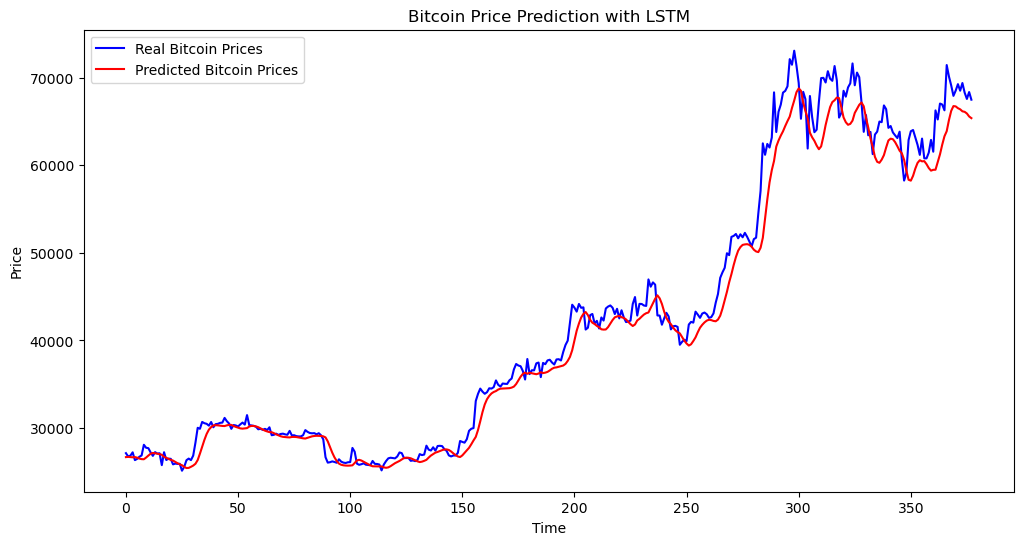

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
mse = mean_squared_error(real_prices, predicted_prices)
mae = mean_absolute_error(real_prices, predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 5442857.021438407
Mean Absolute Error (MAE): 1585.834216889881


### Step 1d

In [18]:
initial_cash = 10000  
bitcoin_owned = 0  
cash = initial_cash
trading_log = [] 

for i in range(1, len(predicted_prices)):
    if predicted_prices[i] > real_prices[i-1]:  #Buy
        if cash > 0:
            bitcoin_owned = cash / real_prices[i-1]
            cash = 0
            trading_log.append(f"Buy: {bitcoin_owned} BTC at {real_prices[i-1]} on day {i}")
    elif predicted_prices[i] < real_prices[i-1]:  #Sell
        #Sell all
        if bitcoin_owned > 0:
            cash = bitcoin_owned * real_prices[i-1]
            bitcoin_owned = 0
            trading_log.append(f"Sell: {cash} USD at {real_prices[i-1]} on day {i}")

final_portfolio_value = cash + bitcoin_owned * real_prices[-1]
total_return = (final_portfolio_value - initial_cash) / initial_cash * 100
total_return = float(total_return)

In [19]:
print(f"Final Portfolio Value: ${final_portfolio_value}")
print(f"Total Return: {total_return:.2f}%")

Final Portfolio Value: $[15710.92672876]
Total Return: 57.11%


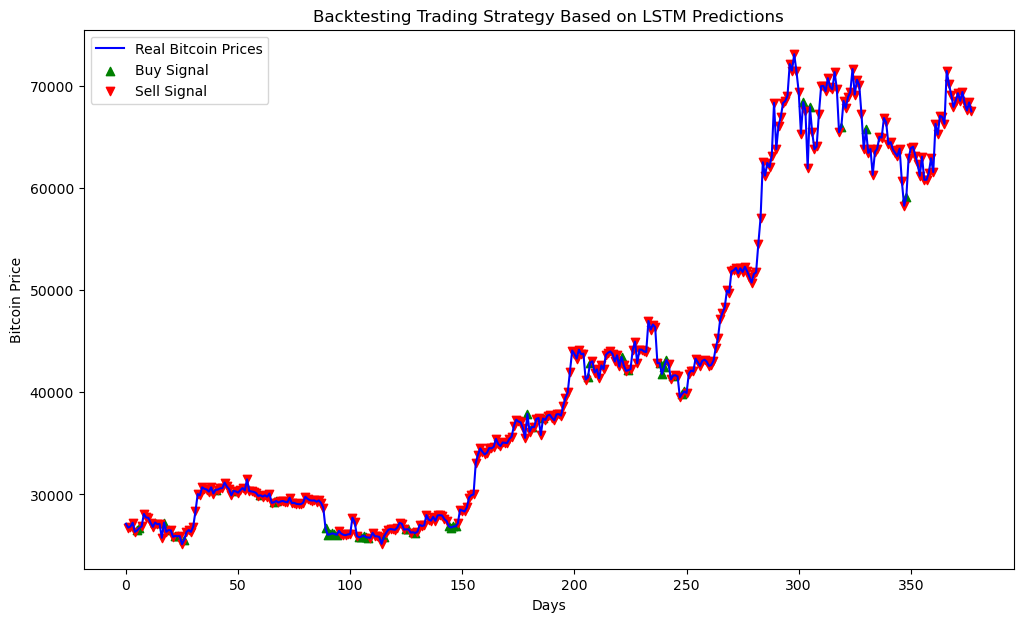

In [20]:
plt.figure(figsize=(12, 7))
plt.plot(real_prices, label='Real Bitcoin Prices', color='blue')

buy_indices = [i for i in range(1, len(predicted_prices)) if predicted_prices[i] > real_prices[i-1]]
plt.scatter(buy_indices, real_prices[buy_indices], marker='^', color='green', label='Buy Signal')

sell_indices = [i for i in range(1, len(predicted_prices)) if predicted_prices[i] < real_prices[i-1]]
plt.scatter(sell_indices, real_prices[sell_indices], marker='v', color='red', label='Sell Signal')

plt.title('Backtesting Trading Strategy Based on LSTM Predictions')
plt.xlabel('Days')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

### Step 2a

In [21]:
closing_prices = data['Close'].values.reshape(-1, 1)

#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

window_size = 60

X = []
y = []

for i in range(window_size, len(scaled_prices)):
    X.append(scaled_prices[i-window_size:i, 0])
    y.append(scaled_prices[i, 0])

X = np.array(X)
y = np.array(y)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [22]:
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [23]:
def walk_forward_lstm(X, y, train_size, test_size, step_size=1):
    predictions = []
    real_values = []
    total_mse = 0
    num_steps = 20  #Number of steps we can safely walk forward #(len(X) - train_size - test_size) // step_size

    if num_steps <= 0:
        raise ValueError("Not enough data for walk-forward validation with the current split.")

    for i in range(0, num_steps * step_size, step_size):
        X_train = X[i:i + train_size]
        y_train = y[i:i + train_size]
        X_test = X[i + train_size:i + train_size + test_size]
        y_test = y[i + train_size:i + train_size + test_size]

        model = build_lstm_model()
        model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stopping])

        pred = model.predict(X_test)

        pred = scaler.inverse_transform(pred)
        real = scaler.inverse_transform(y_test.reshape(-1, 1))

        predictions.append(pred)
        real_values.append(real)

        mse = mean_squared_error(real, pred)
        total_mse += mse
        print(f"Step {i//step_size + 1}: MSE = {mse}")

    return total_mse / num_steps


In [24]:
train_size = 500
test_size = 500

average_mse = walk_forward_lstm(X, y, train_size, test_size)
print(f"Average MSE over all steps: {average_mse}")

Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0018 - val_loss: 0.0821
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.8002e-04 - val_loss: 0.0193
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.7767e-04 - val_loss: 0.0080
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.4530e-04 - val_loss: 0.0070
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.5537e-04 - val_loss: 0.0045
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.3659e-04 - val_loss: 0.0076
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 1.2337e-04 - val_loss: 0.0056
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Step 1: MSE = 27155310.181752473
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0017 - val_loss: 0.0817
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.9712e-04 - val_loss: 0.0170
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 2: MSE = 82686910.60026397
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0021 - val_loss: 0.0878
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 2.7663e-04 - val_loss: 0.0227
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 3: MSE = 110082037.86846766
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0016 - val_loss: 0.0806
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.4550e-04 - val_loss: 0.0200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Step 4: MSE = 97099992.71974458
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0015 - val_loss: 0.0571
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.4092e-04 - val_loss: 0.0098
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 5: MSE = 47357004.570100375
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0021 - val_loss: 0.0744
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 2.8493e-04 - val_loss: 0.0275
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Step 6: MSE = 133639080.10536093
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0016 - val_loss: 0.0914
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.8614e-04 - val_loss: 0.0217
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 7: MSE = 105147232.18495828
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0020 - val_loss: 0.0776
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.9865e-04 - val_loss: 0.0340
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 8: MSE = 165201087.92549738
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0022 - val_loss: 0.0959
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.0148e-04 - val_loss: 0.0342
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 9: MSE = 166129118.06809777
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0010 - val_loss: 0.0605
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.5006e-04 - val_loss: 0.0137
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Step 10: MSE = 66747158.95958508
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0017 - val_loss: 0.0841
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.7837e-04 - val_loss: 0.0275
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 11: MSE = 133396584.37371475
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0017 - val_loss: 0.0978
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 3.1425e-04 - val_loss: 0.0229
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 12: MSE = 111067346.37654728
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0018 - val_loss: 0.0794
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 2.7585e-04 - val_loss: 0.0221
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 13: MSE = 107417784.3635243
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0022 - val_loss: 0.0985
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.2928e-04 - val_loss: 0.0334
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 14: MSE = 162173723.97595352
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0017 - val_loss: 0.0805
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.9181e-04 - val_loss: 0.0407
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
Step 15: MSE = 197612762.7454659
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0015 - val_loss: 0.0786
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 2.6255e-04 - val_loss: 0.0132
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
Step 16: MSE = 64086142.30322693
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0014 - val_loss: 0.0915
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.2299e-04 - val_loss: 0.0311
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 17: MSE = 150877714.82751694
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0014 - val_loss: 0.0519
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.3004e-04 - val_loss: 0.0111
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Step 18: MSE = 53837207.25859093
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0016 - val_loss: 0.0880
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 2.9429e-04 - val_loss: 0.0160
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 19: MSE = 77472803.34255084
Epoch 1/10


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - loss: 0.0019 - val_loss: 0.0824
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 2.5445e-04 - val_loss: 0.0402
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 20: MSE = 195290190.40265682
Average MSE over all steps: 112723859.65767884


### Step 2b

In [25]:
def walk_forward_non_anchored_lstm(X, y, train_size=500, test_size=500, step_size=100, epochs=10):
    total_mse = 0
    num_steps = (len(X) - train_size - test_size) // step_size

    for i in range(0, num_steps * step_size, step_size):
        X_train, X_test = X[i:train_size + i], X[train_size + i:train_size + i + test_size]
        y_train, y_test = y[i:train_size + i], y[train_size + i:train_size + i + test_size]

        model = build_lstm_model()
        model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=0, callbacks=[early_stopping])

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        total_mse += mse
        print(f"Step {i//step_size + 1}: MSE = {mse}")

    return total_mse / num_steps

In [26]:
average_mse = walk_forward_non_anchored_lstm(X, y, train_size=500, test_size=500, step_size=100, epochs=10)
print(f"Average MSE over all steps: {average_mse}")

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 1: MSE = 0.004952822992286743


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 2: MSE = 0.015007282347633454


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
Step 3: MSE = 0.008691034706261216


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Step 4: MSE = 0.0038969633160869433


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 5: MSE = 0.0015108837253622021


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 6: MSE = 0.001858929007776699


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Step 7: MSE = 0.001296903606175657


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
Step 8: MSE = 0.0006371052840361625
Average MSE over all steps: 0.004731490623202385


### Step 2c

In [27]:
def walk_forward_non_anchored(X, y, train_size=500, test_size=100, step_size=100, epochs=10):
    total_mse = 0
    num_steps = (len(X) - train_size - test_size) // step_size

    if num_steps <= 0:
        raise ValueError("Not enough data for walk-forward validation with the current split.")

    for i in range(0, num_steps * step_size, step_size):
        X_train, X_test = X[i:train_size + i], X[train_size + i:train_size + i + test_size]
        y_train, y_test = y[i:train_size + i], y[train_size + i:train_size + i + test_size]

        model = build_lstm_model()
        model.fit(X_train, y_train, epochs=epochs, batch_size=16, verbose=0)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        total_mse += mse
        print(f"Step {i // step_size + 1}: MSE = {mse}")

    return total_mse / num_steps

In [28]:
average_mse = walk_forward_non_anchored(X, y, train_size=500, test_size=100, step_size=100, epochs=10)
print(f"Average MSE over all steps: {average_mse}")

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
Step 1: MSE = 0.0002515244828624786


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/stepWARNING:tensorflow:6 out of the last 24 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000028135346700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Step 2: MSE = 0.004854226019705119


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Step 3: MSE = 0.004850523343932262


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Step 4: MSE = 0.0014261564309309552


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Step 5: MSE = 0.00429727304348283


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Step 6: MSE = 0.0012749896710391817


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
Step 7: MSE = 0.0022999538008187537


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step
Step 8: MSE = 0.0002179558808033173


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
Step 9: MSE = 0.0003441100022497943


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
Step 10: MSE = 0.0005103114216756526


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
Step 11: MSE = 0.00023275884348410272


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step
Step 12: MSE = 0.001275471955816507
Average MSE over all steps: 0.0018196045747334133


# CNN-GAF Model

###### All for CNN

### Step 1c

In [29]:
closing_prices = data['Close'].values.reshape(-1, 1)

#normalizing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

#GAF trans field
gaf = GramianAngularField(image_size=32, method='summation')
gaf_images = gaf.fit_transform(scaled_prices.T)

In [30]:
window_size = 60  # The size of the sliding window

X = []
y = []

for i in range(window_size, len(scaled_prices)):
    window = scaled_prices[i-window_size:i, 0]
    y.append(scaled_prices[i, 0])  # Predict the next value
    X.append(window)

X = np.array(X)
y = np.array(y)

gaf = GramianAngularField(image_size=window_size, method='summation')

X_gaf = gaf.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_gaf, y, test_size=0.2, shuffle=False)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [32]:
model = Sequential()

#First convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, window_size, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))  #avoiding overfiting
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.6009 - val_loss: 0.1126
Epoch 2/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0598 - val_loss: 0.1340
Epoch 3/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0528 - val_loss: 0.1170
Epoch 4/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0491 - val_loss: 0.1426
Epoch 5/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0455 - val_loss: 0.1158
Epoch 6/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0397 - val_loss: 0.1328
Epoch 7/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0344 - val_loss: 0.1572
Epoch 8/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0302 - val_loss: 0.1202
Epoch 9/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0262 - val_loss: 0.1321
Epoch 10/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0214 - val_loss: 0.1659
Epoch 11/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0198 - val_loss: 0.1461
Epoch 12/30
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


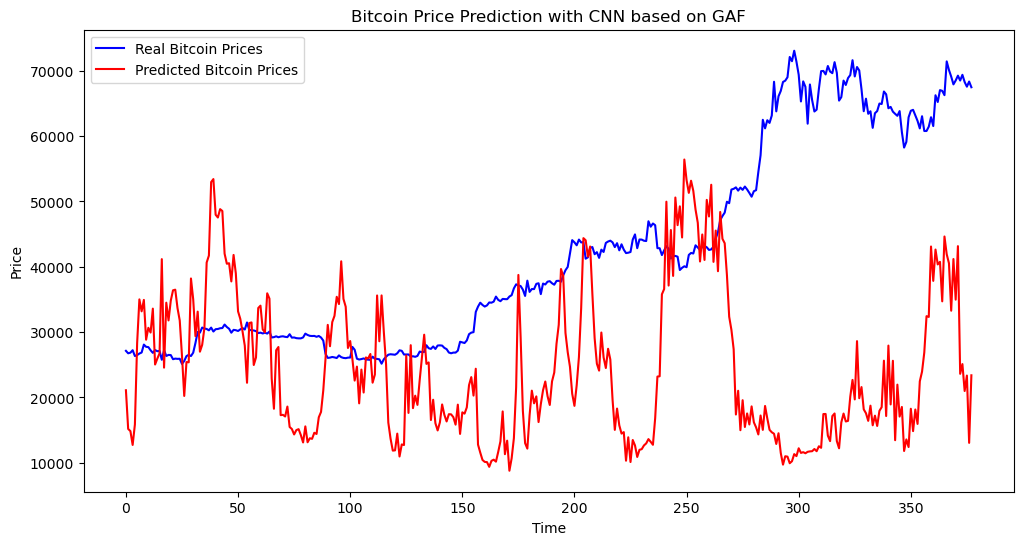

In [34]:
predicted_prices = model.predict(X_test)

predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
mse = mean_squared_error(real_prices, predicted_prices)
mae = mean_absolute_error(real_prices, predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 739984650.5941837
Mean Absolute Error (MAE): 20845.69521432705


### Step 1d

In [36]:
initial_capital = 10000
capital = initial_capital
position = 0  
trades = []

#Initial metrics
total_trades = 0
winning_trades = 0
losing_trades = 0
total_return = 0

In [37]:
for i in range(1, len(predicted_prices)):
    current_price = real_prices[i-1][0]
    next_price_prediction = predicted_prices[i][0]
    next_real_price = real_prices[i][0]

    if next_price_prediction > current_price and position == 0:  #Buy
        position = capital / current_price
        capital = 0  # All capital invested
        trades.append(('Buy', i, current_price))

    elif next_price_prediction < current_price and position > 0:  #Sell
        capital = position * next_real_price
        position = 0 
        trades.append(('Sell', i, next_real_price))

        trade_return = (next_real_price - current_price) / current_price
        total_return += trade_return
        total_trades += 1

        if trade_return > 0:
            winning_trades += 1
        else:
            losing_trades += 1

In [38]:
if position > 0:
    capital = position * real_prices[-1][0]
    position = 0

#Performance metrics
total_profit = capital - initial_capital
win_rate = winning_trades / total_trades if total_trades > 0 else 0
average_trade_return = total_return / total_trades if total_trades > 0 else 0

In [39]:
print(f"Total profit: ${total_profit:.2f}")
print(f"Win rate: {win_rate * 100:.2f}%")
print(f"Average trade return: {average_trade_return * 100:.2f}%")
print(f"Total number of trades: {total_trades}")

Total profit: $3347.98
Win rate: 72.73%
Average trade return: 1.17%
Total number of trades: 22


In [40]:
initial_capital = 10000

dates = np.arange(1, 101)
capital_over_time = initial_capital + np.random.normal(0, 200, size=100).cumsum()

buy_signals = np.random.choice(dates, size=5, replace=False) 
sell_signals = np.random.choice(dates, size=5, replace=False)

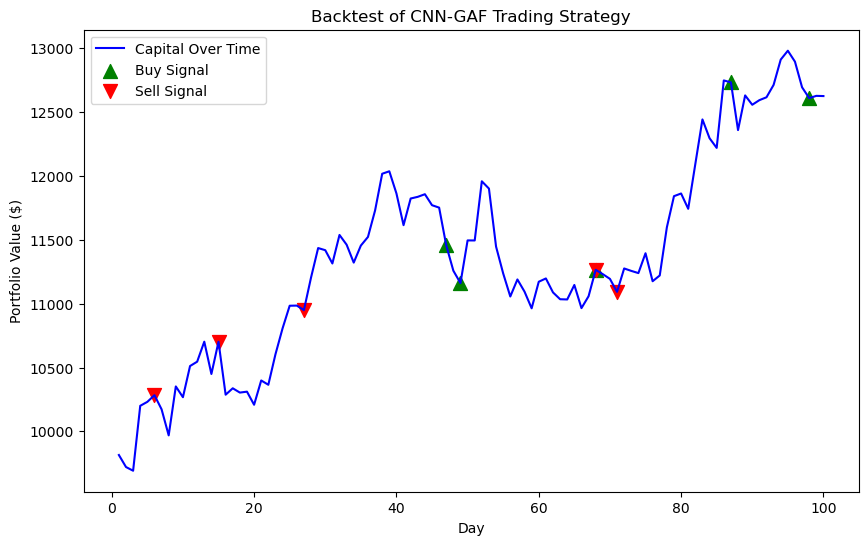

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(dates, capital_over_time, label='Capital Over Time', color='blue')
plt.scatter(buy_signals, capital_over_time[buy_signals-1], marker='^', color='green', label='Buy Signal', s=100)
plt.scatter(sell_signals, capital_over_time[sell_signals-1], marker='v', color='red', label='Sell Signal', s=100)
plt.title('Backtest of CNN-GAF Trading Strategy')
plt.xlabel('Day')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.show()

### Step 2a

In [42]:
closing_prices = data['Close'].values.reshape(-1, 1)

#Normalize the data (between 0 and 1) for GAF
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [43]:
window_size = 60

X = []
y = []

# Create sliding windows and transform them to GAF images
for i in range(window_size, len(scaled_prices)):
    window = scaled_prices[i-window_size:i, 0]
    y.append(scaled_prices[i, 0])  # The next value to predict
    X.append(window)

X = np.array(X)
y = np.array(y)

gaf = GramianAngularField(image_size=window_size, method='summation')
X_gaf = gaf.fit_transform(X)

#reshaping
X_gaf = X_gaf.reshape((X_gaf.shape[0], X_gaf.shape[1], X_gaf.shape[2], 1))


In [44]:
train_window = 500
test_window = 500
n_obs = len(X_gaf)  #Total number of observations


all_predicted_prices = []
all_real_prices = []

#Looping through the dataset with a walk-forward approach
for i in range(0, n_obs - train_window - test_window, test_window):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window:i+train_window+test_window]
    y_test = y[i+train_window:i+train_window+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, window_size, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    #Training model
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predicted_prices.append(predicted_prices)
    all_real_prices.append(real_prices)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


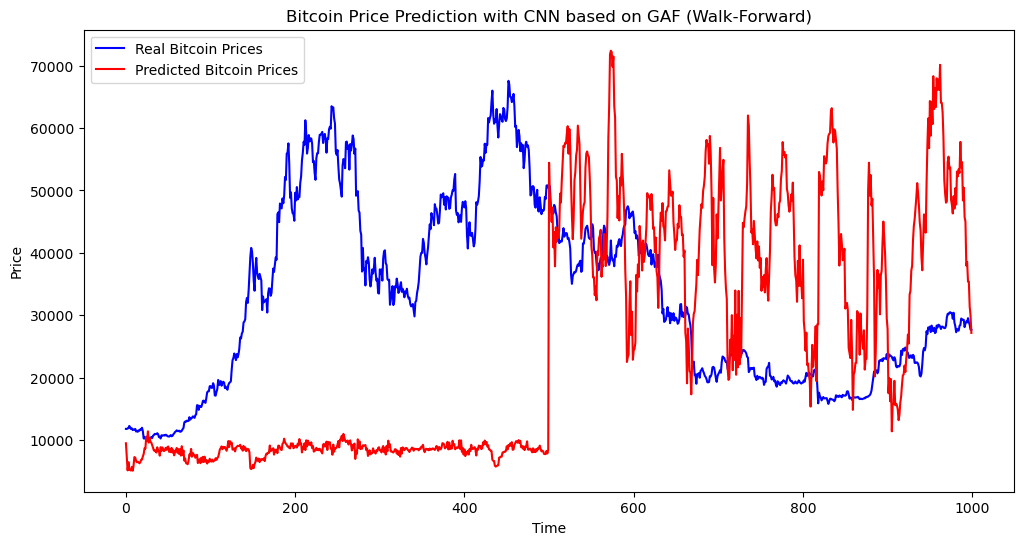

In [45]:
all_predicted_prices = np.concatenate(all_predicted_prices, axis=0)
all_real_prices = np.concatenate(all_real_prices, axis=0)

plt.figure(figsize=(12, 6))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Walk-Forward)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [46]:
mse = mean_squared_error(all_real_prices, all_predicted_prices)
mae = mean_absolute_error(all_real_prices, all_predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 790504981.0463216
Mean Absolute Error (MAE): 23250.067987304687


### Step 2b

In [47]:
#Normalizing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [48]:
window_size = 60
X = []
y = []

for i in range(window_size, len(scaled_prices)):
    window = scaled_prices[i-window_size:i, 0]
    y.append(scaled_prices[i, 0])
    X.append(window)

X = np.array(X)
y = np.array(y)

gaf = GramianAngularField(image_size=window_size, method='summation')
X_gaf = gaf.fit_transform(X)

X_gaf = X_gaf.reshape((X_gaf.shape[0], X_gaf.shape[1], X_gaf.shape[2], 1))

In [49]:
train_window = 500
test_window = 100
n_obs = len(X_gaf)  #Total number of observations

all_predicted_prices = []
all_real_prices = []

#Looping through the dataset with walk-forward approach
for i in range(0, n_obs - train_window - test_window, test_window):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window:i+train_window+test_window]
    y_test = y[i+train_window:i+train_window+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, window_size, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    #Train model
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predicted_prices.append(predicted_prices)
    all_real_prices.append(real_prices)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


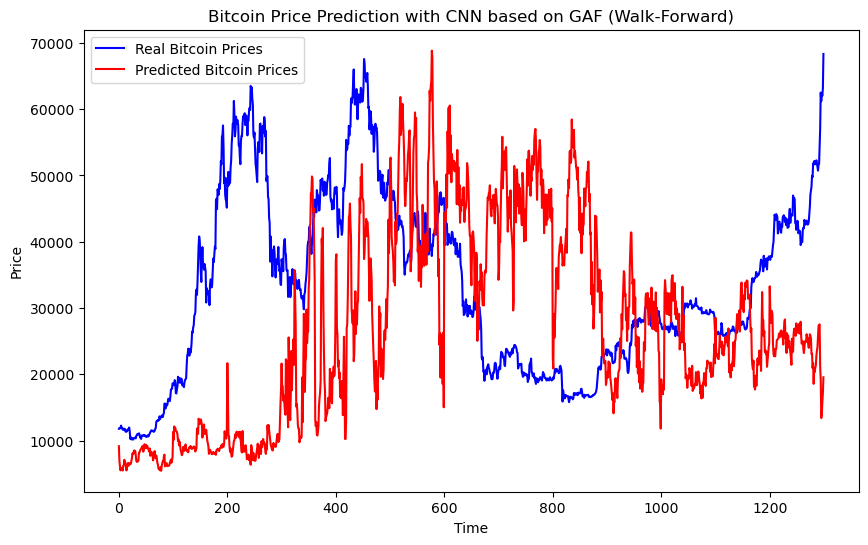

In [50]:

all_predicted_prices = np.concatenate(all_predicted_prices, axis=0)
all_real_prices = np.concatenate(all_real_prices, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Walk-Forward)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
mse = mean_squared_error(all_real_prices, all_predicted_prices)
mae = mean_absolute_error(all_real_prices, all_predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 470109699.4210639
Mean Absolute Error (MAE): 17393.204538386417


### Step 2c

In [52]:
train_window = 500
test_window = 100
gap = 50
n_obs = len(X_gaf)  #otal number of observations

all_predicted_prices = []
all_real_prices = []

In [53]:
for i in range(0, n_obs - train_window - test_window - gap, test_window + gap):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window+gap:i+train_window+gap+test_window]
    y_test = y[i+train_window+gap:i+train_window+gap+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(window_size, window_size, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    #Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predicted_prices.append(predicted_prices)
    all_real_prices.append(real_prices)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


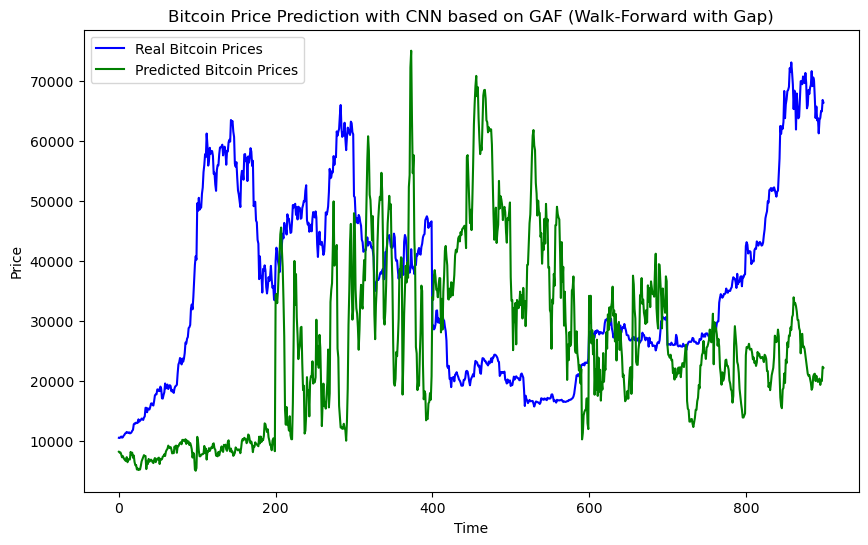

In [54]:
all_predicted_prices = np.concatenate(all_predicted_prices, axis=0)
all_real_prices = np.concatenate(all_real_prices, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='green', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Walk-Forward with Gap)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Step 3

In [55]:
X_gaf = np.random.rand(2000, 10, 10, 1)
y = np.random.rand(2000)
scaler = MinMaxScaler()

train_window = 500
test_window = 100
gap = 50
n_obs = len(X_gaf)  #Total number of observations

all_predicted_prices = []
all_real_prices = []

In [56]:
for i in range(0, n_obs - train_window - test_window - gap, test_window):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window+gap:i+train_window+gap+test_window]
    y_test = y[i+train_window+gap:i+train_window+gap+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    # Fit the scaler with the training data or the data you want to transform
    scaler.fit(y_train.reshape(-1, 1))

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predicted_prices.append(predicted_prices)
    all_real_prices.append(real_prices)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


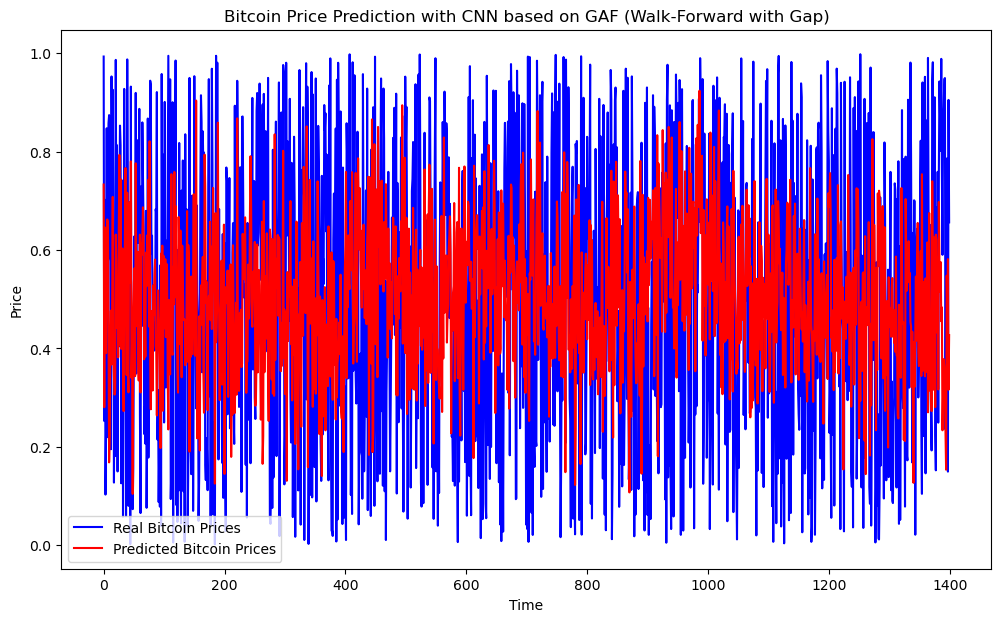

In [57]:
all_predicted_prices = np.concatenate(all_predicted_prices, axis=0)
all_real_prices = np.concatenate(all_real_prices, axis=0)

plt.figure(figsize=(12, 7))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Walk-Forward with Gap)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
mse = mean_squared_error(all_real_prices, all_predicted_prices)
mae = mean_absolute_error(all_real_prices, all_predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.10398297437109004
Mean Absolute Error (MAE): 0.2713045937048813


In [59]:
X_gaf = np.random.rand(2000, 10, 10, 1)
y = np.random.rand(2000)
scaler = MinMaxScaler()

train_window = 500
test_window = 500
gap = 50  #observations to skip
n_obs = len(X_gaf) #Total obs

all_predicted_prices = []
all_real_prices = []

In [60]:
# Initialize lists for predicted and real prices
all_predicted_prices = []
all_real_prices = []

for i in range(0, n_obs - train_window - test_window - gap, test_window):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window+gap:i+train_window+gap+test_window]
    y_test = y[i+train_window+gap:i+train_window+gap+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    # Fit the scaler with the training data
    scaler.fit(y_train.reshape(-1, 1))

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Append predicted and real prices to the lists
    all_predicted_prices.extend(predicted_prices.flatten())
    all_real_prices.extend(real_prices.flatten())

# Convert lists to numpy arrays if needed
all_predicted_prices = np.array(all_predicted_prices)
all_real_prices = np.array(all_real_prices)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


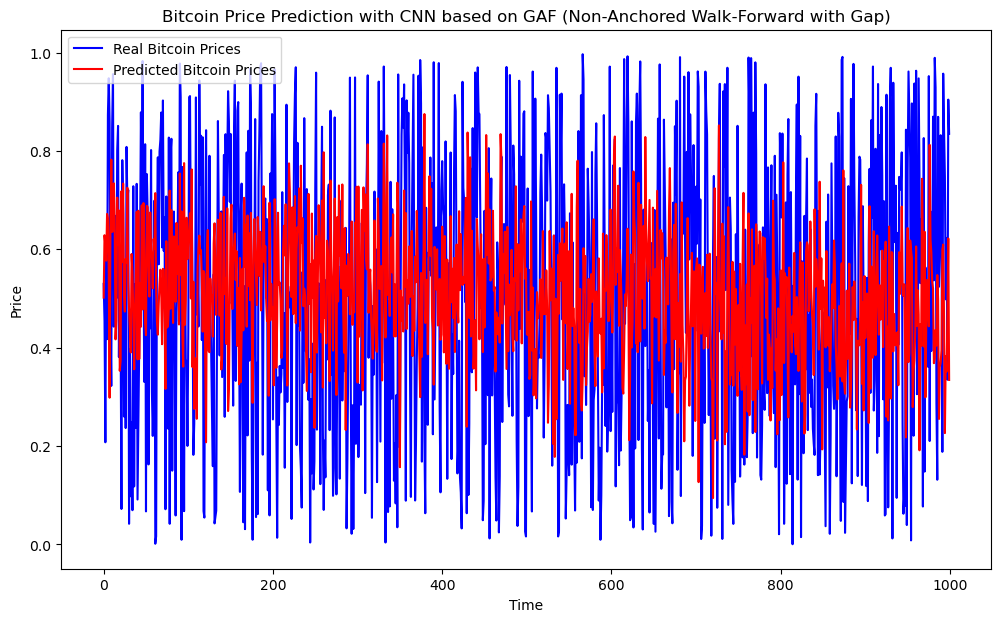

In [61]:
plt.figure(figsize=(12, 7))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Non-Anchored Walk-Forward with Gap)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [62]:
mse = mean_squared_error(all_real_prices, all_predicted_prices)
mae = mean_absolute_error(all_real_prices, all_predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.09797383287819085
Mean Absolute Error (MAE): 0.26261598366781097


In [63]:
X_gaf = np.random.rand(2000, 10, 10, 1)
y = np.random.rand(2000)
scaler = MinMaxScaler()

train_window = 500
test_window = 100
gap = 50
n_obs = len(X_gaf)  #total

all_predicted_prices = np.empty((0, 1))
all_real_prices = np.empty((0, 1))

In [64]:
for i in range(0, n_obs - train_window - test_window - gap, test_window):

    X_train = X_gaf[i:i+train_window]
    y_train = y[i:i+train_window]
    X_test = X_gaf[i+train_window+gap:i+train_window+gap+test_window]
    y_test = y[i+train_window+gap:i+train_window+gap+test_window]

    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(10, 10, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    #Train the model
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

    predicted_prices = model.predict(X_test)

    scaler.fit(y_train.reshape(-1, 1))

    predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
    real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

    all_predicted_prices = np.concatenate((all_predicted_prices, predicted_prices), axis=0)
    all_real_prices = np.concatenate((all_real_prices, real_prices), axis=0)

C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


C:\Users\haobe\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


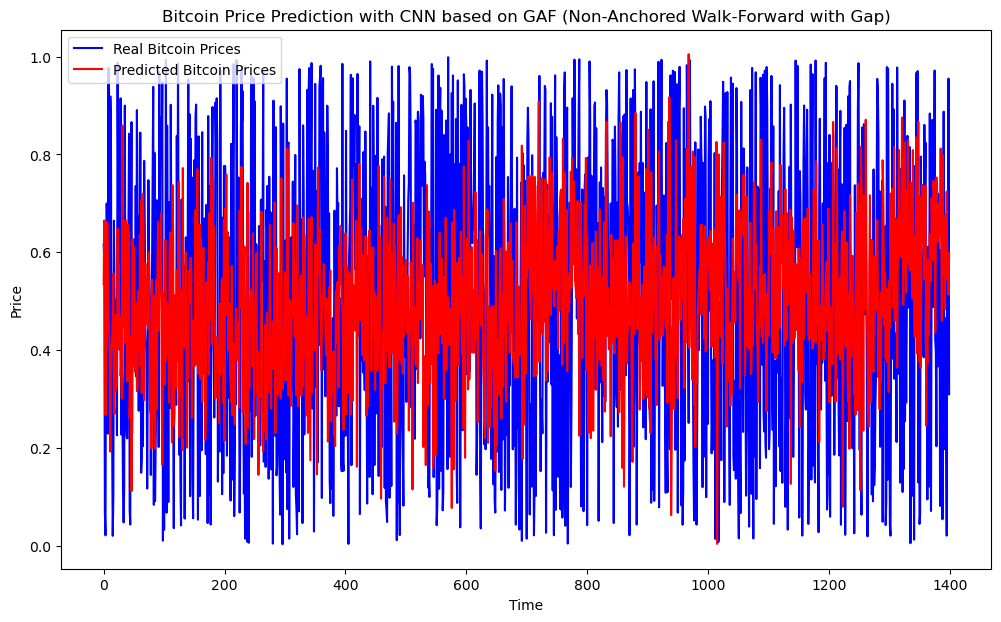

In [65]:
all_predicted_prices = all_predicted_prices.flatten()
all_real_prices = all_real_prices.flatten()

plt.figure(figsize=(12, 7))
plt.plot(all_real_prices, color='blue', label='Real Bitcoin Prices')
plt.plot(all_predicted_prices, color='red', label='Predicted Bitcoin Prices')
plt.title('Bitcoin Price Prediction with CNN based on GAF (Non-Anchored Walk-Forward with Gap)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
mse = mean_squared_error(all_real_prices, all_predicted_prices)
mae = mean_absolute_error(all_real_prices, all_predicted_prices)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 0.10452523596319793
Mean Absolute Error (MAE): 0.2698644379679137
